In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
%ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: 8662-E62D

 Directorio de c:\Users\JuanAndres\Documents\Parcial3\Armonico

20/05/2023  09:42 a.�m.    <DIR>          .
20/05/2023  09:42 a.�m.    <DIR>          ..
20/05/2023  09:42 a.�m.           635.479 Notebook parcial III.ipynb
13/05/2023  03:54 p.�m.         1.965.029 oscilador_armonico.csv
14/05/2023  08:09 a.�m.           183.712 oscilador_armonico_amortiguado,a=1.csv
14/05/2023  08:15 a.�m.           183.712 oscilador_armonico_amortiguado,a=16.csv
14/05/2023  08:06 a.�m.           183.712 oscilador_armonico_amortiguado,a=2.csv
14/05/2023  07:50 a.�m.           183.712 oscilador_armonico_amortiguado,a=4.csv
14/05/2023  07:51 a.�m.           183.712 oscilador_armonico_amortiguado,a=8.csv
14/05/2023  07:45 a.�m.           183.712 oscilador_armonico_amortiguado.csv
14/05/2023  08:59 a.�m.           183.712 oscilador_armonico_amortiguado_debil,a=1.csv
14/05/2023  09:01 a.�m.           183.712 oscilado

In [3]:
#cd Lineal
%cd Lineal

def solvr(Y, t):
    dydt=[Y[1],  -delta*Y[1]-a*Y[0]+gamma*np.cos(w*t)]
    return dydt

def error_Abs_Acum(x1,x2):
    suma=0;lista=[]
    for i in range(0, len(x1)):
        lista.append(suma)
        suma=suma+(x1[i]-x2[i])
    return lista



[WinError 2] El sistema no puede encontrar el archivo especificado: 'Lineal'
c:\Users\JuanAndres\Documents\Parcial3\Armonico


In [4]:
t = np.linspace(0,100*np.pi, 100002) #Tempo de integración
y0=[0,2.5] #Condiciones inciales dy/dx[0], y[0]

#Constantes del oscillador
gamma=0  
delta=0
a=4
w=np.sqrt(2)

sol= odeint(solvr, y0, t)
x=sol[:,0]
y=sol[:,1]

In [5]:
y[-1]

2.5000154250435087

 condiciones codigo 0, 20*M_PI, 20,-14.33833799090355, 10000)

## Oscilador armónico sin perdidas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


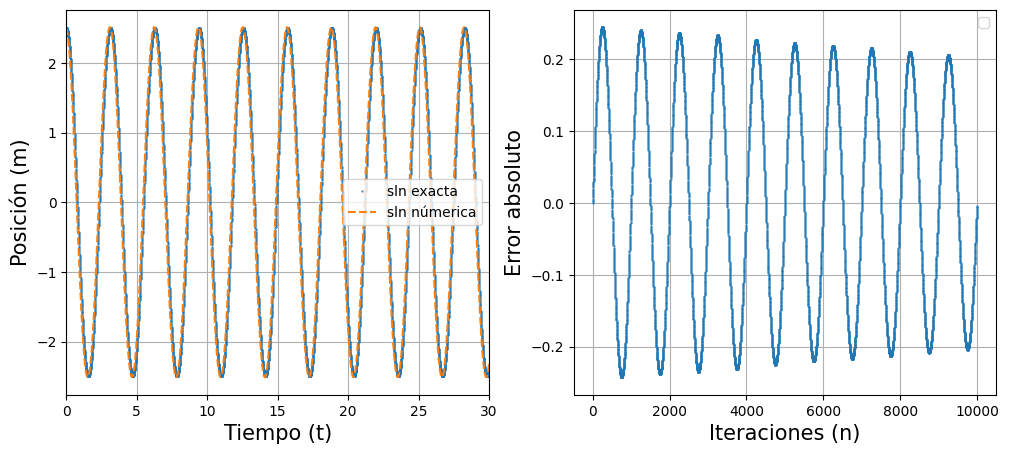

In [7]:
data = pd.read_csv("oscilador_armonico.csv")

#fig, ax1 = plt.subplots(1, 1,figsize=(10,5))
fig, ax1 = plt.subplots(1, 2,figsize=(12,5))
ax1[0].plot(t[0:10000],y[0:10000],"o",markersize=0.5,label="sln exacta")
ax1[0].plot(data.x.values[0:10000], data.y.values[0:10000],"--",label="sln númerica")
ax1[0].grid()
ax1[0].legend()

ax1[0].set_xlim(0,30)


ax1[1].plot(((y[0:10000]-data.y.values[0:10000])),"o",markersize=0.5)#,label="sln scipy")
ax1[1].grid()
ax1[1].legend()
ax1[0].set_xlabel("Tiempo (t)",fontsize=15)
ax1[0].set_ylabel("Posición (m)",fontsize=15)
ax1[1].set_xlabel("Iteraciones (n)",fontsize=15)
ax1[1].set_ylabel("Error absoluto",fontsize=15)
xticks = np.arange(0, 50, 5)
xticks2=np.arange(0, 10000,2000)
#ax1[0].set_xticks(xticks,fontsize=15)
#ax1[1].set_xticks(xticks2,fontsize=15)

# Oscilador armonico con perdidas

## Amortiguamiento debil

In [ ]:
t = np.linspace(0,5*np.pi, 10004) #Tempo de integración
y0=[0,10] #Condiciones inciales dy/dx[0], y[0]

#Constantes del oscillador
gamma=0  
delta=1
w=np.sqrt(2)

#Ecuaciones diferenciales para diferentes a

a=1
sol= odeint(solvr, y0, t)
y=sol[:,1]
print("Punto final: ",y[-1]," b^2-4k :",delta**2-4*a)
data= pd.read_csv("oscilador_armonico_amortiguado_debil,a=1.csv")


a=2
sol= odeint(solvr, y0, t)
y2=sol[:,1]
print("Punto final: ",y2[-1]," b^2-4k :",delta**2-4*a)
data2 = pd.read_csv("oscilador_armonico_amortiguado_debil,a=2.csv")

a=4
sol= odeint(solvr, y0, t)
y3=sol[:,1]
print("Punto final: ",y3[-1]," b^2-4k :",delta**2-4*a)
data3 = pd.read_csv("oscilador_armonico_amortiguado_debil,a=4.csv")

a=8
sol= odeint(solvr, y0, t)
y4=sol[:,1]

print("Punto final: ",y4[-1]," b^2-4k :",delta**2-4*a)
x=sol[:,0]
data4 = pd.read_csv("oscilador_armonico_amortiguado_debil,a=8.csv")


a=16
sol= odeint(solvr, y0, t)
y5=sol[:,1]

print("Punto final: ",y5[-1]," b^2-4k :",delta**2-4*a)
data5 = pd.read_csv("oscilador_armonico_amortiguado_debil,a=16.csv")


Punto final:  4.513357448517074e-05  b^2-4k : -3
Punto final:  -0.002738682488741656  b^2-4k : -7
Punto final:  0.0029474912457891915  b^2-4k : -15
Punto final:  0.003932977646662901  b^2-4k : -31
Punto final:  0.003651472480773197  b^2-4k : -63


Text(0, 0.5, 'Error absoluto')

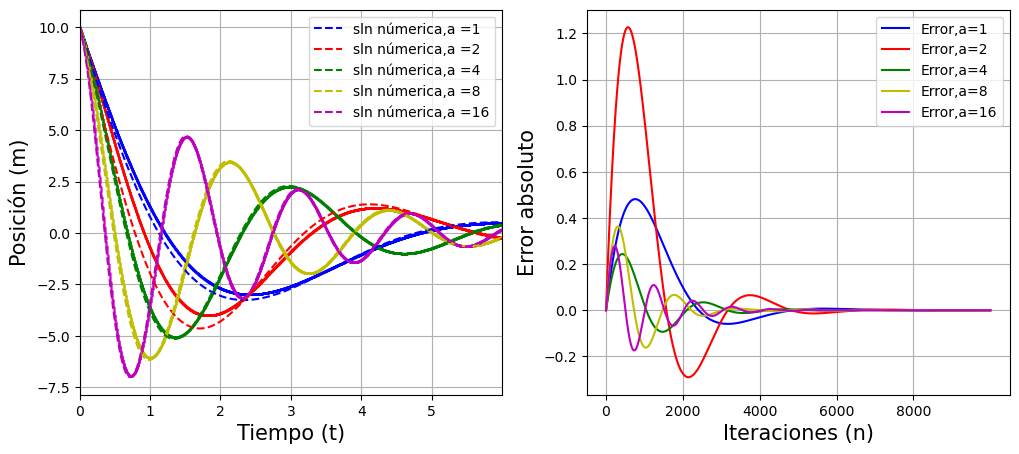

In [ ]:


#fig, ax1 = plt.subplots(1, 1,figsize=(10,5))
fig, ax1 = plt.subplots(1, 2,figsize=(12,5))

ax1[0].plot(t,y,"o",markersize=0.5 ,color="b")#,label="sln exacta,a =1")
ax1[0].plot(t,y2,"o",markersize=0.5,color="r")#,label="sln exacta,a =2")
ax1[0].plot(t,y3,"o",markersize=0.5,color="g")#,label="sln exacta,a =4")
ax1[0].plot(t,y4,"o",markersize=0.5,color="y")#,label="sln exacta,a =8")
ax1[0].plot(t,y5,"o",markersize=0.5,color="m")#,label="sln exacta,a =16")
ax1[0].set_xlabel("Tiempo (t)",fontsize=15)
ax1[0].set_ylabel("Posición (m)",fontsize=15)
ax1[1].set_xlabel("Iteraciones (n)",fontsize=15)
ax1[1].set_ylabel("Error absoluto",fontsize=15)
xticks = np.arange(0, 6, 1)
xticks2=np.arange(0, 10000,2000)
ax1[0].set_xticks(xticks,fontsize=15)
ax1[1].set_xticks(xticks2,fontsize=15)

ax1[0].plot(data.x.values, data.y.values,"--"  ,color="b",label="sln númerica,a =1")
ax1[0].plot(data2.x.values, data2.y.values,"--",color="r",label="sln númerica,a =2")
ax1[0].plot(data3.x.values, data3.y.values,"--",color="g",label="sln númerica,a =4")
ax1[0].plot(data4.x.values, data4.y.values,"--",color="y",label="sln númerica,a =8")
ax1[0].plot(data5.x.values, data5.y.values,"--",color="m",label="sln númerica,a =16")

ax1[0].grid()
ax1[0].legend()
ax1[0].set_xlabel("Tiempo (t)")
ax1[0].set_ylabel("Posición (m)")
ax1[0].set_xlim(0,6)
#ax1[0].set_ylim(0,20)

ax1[1].plot(((y-data.y.values)),"-"  ,markersize=0.5,color="b",label="Error,a=1")
ax1[1].plot(((y2-data2.y.values)),"-",markersize=0.5,color="r",label="Error,a=2")
ax1[1].plot(((y3-data3.y.values)),"-",markersize=0.5,color="g",label="Error,a=4")
ax1[1].plot(((y4-data4.y.values)),"-",markersize=0.5,color="y",label="Error,a=8")
ax1[1].plot(((y5-data5.y.values)),"-",markersize=0.5,color="m",label="Error,a=16")
ax1[1].grid()
ax1[1].legend()
#ax1[1].set_ticks
ax1[1].set_xlabel("Iteraciones (n)",fontsize=15)
ax1[1].set_ylabel("Error absoluto",fontsize=15)
#ax1[1].xlim(0,30)
#plt.ylim(1,22)




In [ ]:
t = np.linspace(0,5*np.pi, 10004) #Tempo de integración
y0=[0,10] #Condiciones inciales dy/dx[0], y[0]

#Constantes del oscillador
gamma=0  
delta=9
#w=np.sqrt(2)

#Ecuaciones diferenciales para diferentes a

a=1
sol= odeint(solvr, y0, t)
y=sol[:,1]
print("Punto final: ",y[-1]," b^2-4k :",delta**2-4*a)
data = pd.read_csv("oscilador_armonico_amortiguado_fuerte,a=1.csv")


a=2
sol= odeint(solvr, y0, t)
y2=sol[:,1]
print("Punto final: ",y2[-1]," b^2-4k :",delta**2-4*a)
data2 = pd.read_csv("oscilador_armonico_amortiguado_fuerte,a=2.csv")

a=4
sol= odeint(solvr, y0, t)
y3=sol[:,1]
print("Punto final: ",y3[-1]," b^2-4k :",delta**2-4*a)
data3 = pd.read_csv("oscilador_armonico_amortiguado_fuerte,a=4.csv")

a=8
sol= odeint(solvr, y0, t)
y4=sol[:,1]

print("Punto final: ",y4[-1]," b^2-4k :",delta**2-4*a)
x=sol[:,0]
data4 = pd.read_csv("oscilador_armonico_amortiguado_fuerte,a=8.csv")


a=16
sol= odeint(solvr, y0, t)
y5=sol[:,1]

print("Punto final: ",y5[-1]," b^2-4k :",delta**2-4*a)
data5 = pd.read_csv("oscilador_armonico_amortiguado_fuerte,a=16.csv")

Punto final:  -0.021897403256637412  b^2-4k : 77
Punto final:  -0.0074283698061917815  b^2-4k : 73
Punto final:  -0.00036815175445081795  b^2-4k : 65
Punto final:  -2.1743119464088683e-07  b^2-4k : 49
Punto final:  6.848123362952923e-11  b^2-4k : 17


Text(0, 0.5, 'Error absoluto')

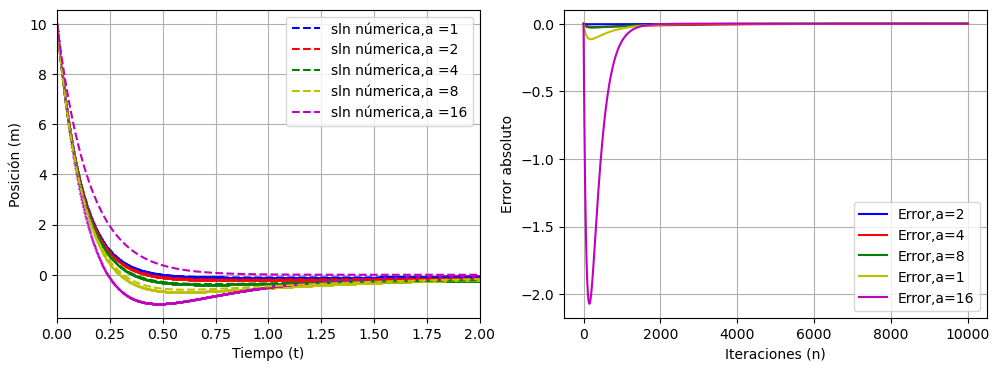

In [ ]:


#fig, ax1 = plt.subplots(1, 1,figsize=(10,5))
fig, ax1 = plt.subplots(1, 2,figsize=(12,4))
ax1[0].plot(t,y ,"o",markersize=0.5,color="b")#,label="sln exacta,a =1")
ax1[0].plot(t,y2,"o",markersize=0.5,color="r")#,label="sln exacta,a =2")
ax1[0].plot(t,y3,"o",markersize=0.5,color="g")#,label="sln exacta,a =4")
ax1[0].plot(t,y4,"o",markersize=0.5,color="y")#,label="sln exacta,a =8")
ax1[0].plot(t,y5,"o",markersize=0.5,color="m")#,label="sln exacta,a =16")

ax1[0].plot(data.x.values, data.y.values ,"--" ,color="b",label="sln númerica,a =1")
ax1[0].plot(data2.x.values, data2.y.values,"--",color="r",label="sln númerica,a =2")
ax1[0].plot(data3.x.values, data3.y.values,"--",color="g",label="sln númerica,a =4")
ax1[0].plot(data4.x.values, data4.y.values,"--",color="y",label="sln númerica,a =8")
ax1[0].plot(data5.x.values, data5.y.values,"--",color="m",label="sln númerica,a =16")

ax1[0].grid()
ax1[0].legend()
ax1[0].set_xlabel("Tiempo (t)")
ax1[0].set_ylabel("Posición (m)")
ax1[0].set_xlim(0,2)
#ax1[0].set_ylim(0,20)

ax1[1].plot((y-data.y.values),"-",markersize=0.5  ,color="b",label="Error,a=2")
ax1[1].plot((y2-data2.y.values),"-",markersize=0.5,color="r",label="Error,a=4")
ax1[1].plot((y3-data3.y.values),"-",markersize=0.5,color="g",label="Error,a=8")
ax1[1].plot((y4-data4.y.values),"-",markersize=0.5,color="y",label="Error,a=1")
ax1[1].plot((y5-data5.y.values),"-",markersize=0.5,color="m",label="Error,a=16")

ax1[1].grid()
ax1[1].legend()
ax1[1].set_xlabel("Iteraciones (n)")
ax1[1].set_ylabel("Error absoluto")
#ax1[1].xlim(0,30)
#plt.ylim(1,22)

#print(data.x.values)

## Forzado

In [ ]:
t = np.linspace(0,10*np.pi, 10004) #Tiempo de integración
y0=[0,10] #Condiciones inciales dy/dx[0], y[0]

#Constantes del oscillador
gamma=2  
delta=0
w=np.sqrt(a)

#Ecuaciones diferenciales para diferentes a


a=8
w=np.sqrt(2)

sol= odeint(solvr, y0, t)
y4=sol[:,1]

print("Punto final: ",y4[-1]," b^2-4k :",delta**2-4*a)
x=sol[:,0]
data4 = pd.read_csv("oscilador_armonico_forzado2,a=8.csv")




Punto final:  37.66045727975829  b^2-4k : -8
Punto final:  9.389286984937566  b^2-4k : -16
Punto final:  6.801158720366725  b^2-4k : -32


Text(0, 0.5, 'Error absoluto')

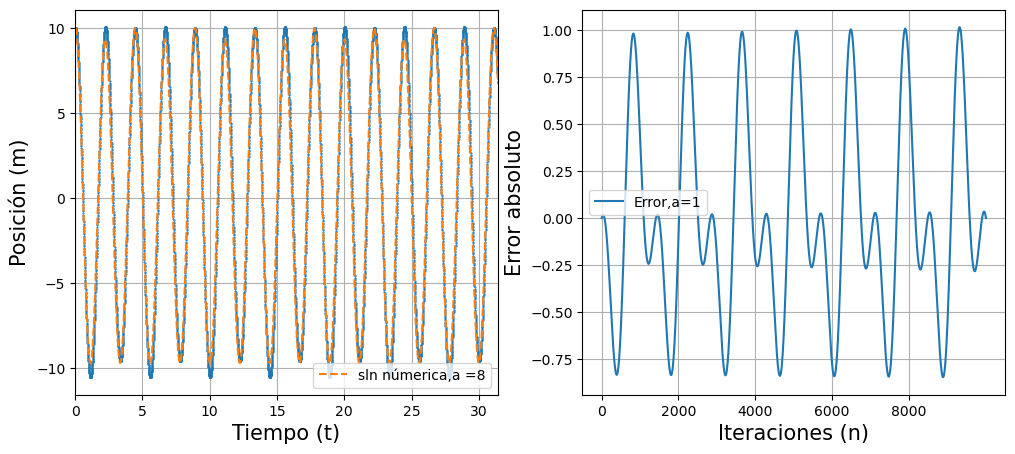

In [ ]:

#fig, ax1 = plt.subplots(1, 1,figsize=(10,5))
fig, ax1 = plt.subplots(1, 2,figsize=(12,5))
#ax1[0].plot(t,y,"o",markersize=0.5)#,label="sln exacta,a =1")
#ax1[0].plot(t,y2,"o",markersize=0.5,label="sln exacta,a =2")
#ax1[0].plot(t,y3,"o",markersize=0.5)#,label="sln exacta,a =4")
ax1[0].plot(t,y4,"o",markersize=0.5)#,label="sln exacta,a =8")
#ax1[0].plot(t,y5,"o",markersize=0.5)#,label="sln exacta,a =16")

ax1[0].plot(data4.x.values, data4.y.values,"--",label="sln númerica,a =8")

ax1[0].set_xlabel("Tiempo (t)",fontsize=15)
ax1[0].set_ylabel("Posición (m)",fontsize=15)
ax1[1].set_xlabel("Iteraciones (n)",fontsize=15)
ax1[1].set_ylabel("Error absoluto",fontsize=15)
xticks = np.arange(0, 10*np.pi, 5)
xticks2=np.arange(0, 10000,2000)
ax1[0].set_xticks(xticks,fontsize=15)
ax1[1].set_xticks(xticks2,fontsize=15)
ax1[0].grid()
ax1[0].legend()
ax1[0].set_xlabel("Tiempo (t)")
ax1[0].set_ylabel("Posición (m)")
ax1[0].set_xlim(0,10*np.pi)
#ax1[0].set_ylim(0,20)

#ax1[1].plot((y-data.y.values),"-",markersize=0.5,label="Error,a=2")
#ax1[1].plot(abs((y2-data2.y.values)),"-",markersize=0.5,label="Error,a=4")
#ax1[1].plot((y3-data3.y.values),"-",markersize=0.5,label="Error,a=8")
ax1[1].plot((y4-data4.y.values),"-",markersize=0.5,label="Error,a=1")
#ax1[1].plot((y5-data5.y.values),"-",markersize=0.5,label="Error,a=16")

ax1[1].grid()
ax1[1].legend()
ax1[1].set_xlabel("Iteraciones (n)")
ax1[1].set_ylabel("Error absoluto")
#ax1[1].xlim(0,30)
#plt.ylim(1,22)

#print(data.x.values)

In [ ]:
def f(x,a):
    solucion=np.cos(x*a)
    return solucion
def g(x,a):
    solucion=(np.cos(x*a/2)+np.sin(x*a/2))*np.exp(-x/2)
    return solucion
x=np.linspace(0,4*np.pi,1000)
g(4*np.pi,1)

0.0018674427317079889

## Oscilador forzado con resonancia

In [ ]:
t = np.linspace(0,10*np.pi, 10004) #Tempo de integración
y0=[0,10] #Condiciones inciales dy/dx[0], y[0]

#Constantes del oscillador
gamma=2  
delta=0
w=np.sqrt(a)

#Ecuaciones diferenciales para diferentes a



a=2
w=np.sqrt(2)

sol= odeint(solvr, y0, t)
y2=sol[:,1]
print("Punto final: ",y2[-1]," b^2-4k :",delta**2-4*a)
data2 = pd.read_csv("oscilador_armonico_forzado_resonancia,a=2.csv")



Punto final:  37.66045727975829  b^2-4k : -8
Punto final:  9.389286984937566  b^2-4k : -16
Punto final:  41.41592883506075  b^2-4k : -16


Text(0, 0.5, 'Error absoluto')

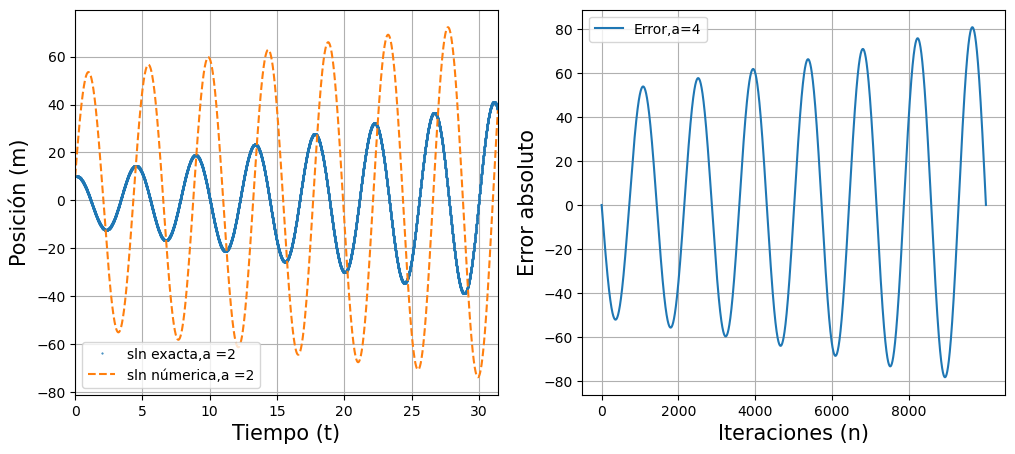

In [ ]:

#fig, ax1 = plt.subplots(1, 1,figsize=(10,5))
fig, ax1 = plt.subplots(1, 2,figsize=(12,5))
ax1[0].plot(t,y2,"o",markersize=0.5,label="sln exacta,a =2")
ax1[0].plot(data2.x.values, data2.y.values,"--",label="sln númerica,a =2")


ax1[0].set_xlabel("Tiempo (t)",fontsize=15)
ax1[0].set_ylabel("Posición (m)",fontsize=15)
ax1[1].set_xlabel("Iteraciones (n)",fontsize=15)
ax1[1].set_ylabel("Error absoluto",fontsize=15)
xticks = np.arange(0, 10*np.pi, 5)
xticks2=np.arange(0, 10000,2000)
ax1[0].set_xticks(xticks,fontsize=15)
ax1[1].set_xticks(xticks2,fontsize=15)
ax1[0].grid()
ax1[0].legend()
ax1[0].set_xlabel("Tiempo (t)")
ax1[0].set_ylabel("Posición (m)")
ax1[0].set_xlim(0,10*np.pi)
#ax1[0].set_ylim(0,20)

ax1[1].plot(((y2-data2.y.values)),"-",markersize=0.5,label="Error,a=4")


ax1[1].grid()
ax1[1].legend()
ax1[1].set_xlabel("Iteraciones (n)")
ax1[1].set_ylabel("Error absoluto")
#ax1[1].xlim(0,30)
#plt.ylim(1,22)

#print(data.x.values)